<a href="https://colab.research.google.com/github/Technology-for-the-Poorest-Billion/2025-Majicom-WaterCooling/blob/main/interim/Active%20cooling%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The main aim of this notebook is to provide the tools to analyse a custom made water cooling system. By showing how performance is predicted from first principles, it allows to evaluate different cooling option. Importantly it allows to modify all the parameters, to fit the ever changing objectives and developments. This approach allows to compare various cooling options and choose the one that is best suited for the task at hand. The analysis is written in such language as to allow all stakeholders, including non-technical ones to understand it and be able to draw conclusions.

Several options were identified as possibilities of cooling water in the tank:

- Cooling as the water is dispensed with either Peltier, or a cycle cooler
- Cooling the whole water tank with either Peltier or a cycle cooler
- Cooling a smaller tank prior to dispensal
- Heat exchanger with the tap water

This analysis will go through each of these options and determine its suitability, aiming to choose the best one by the end of the notebook.

# 1. First principle analysis


Firstly, the parameters and aims need to be initialised:

- Water dispensal time
- Amount of the water dispensed
- Average dispensal rate
- Temperature drop

Modyfying the parameters here will allow to change this analysis to see which of these methods allow reaching the objectives.

In [6]:
dispensal_time = 10 #s
average_time = 30 #s Average time between water dispensals
dT = 5 #C Temperature drop
m = 0.5 #kg Mass of dispensed water
c = 4200 #Heat capacity of water in J/kg/K
Cold_water_ratio = 0.3 #fraction of people willing to pay for extra cold water


This allows to calculate several important properties: the energy needed to cool one portion of water and average power required to do so. These are derived from fundamental thermodynamic principles and connot be improved on.

In [7]:
Energy = m*c*dT
print(f"Energy necessary to cool one portion water = {Energy:.0f} Joules")
Power = Energy/average_time
print(f"Average cooling power necessary to cool the water = {Power:.0f} Watts")


Energy necessary to cool one portion water = 10500 Joules
Average cooling power necessary to cool the water = 350 Watts


This result is expressed in terms of the cooling power. However, this is not the same as electrical power and could be misleading. The cell below calculates the electrical power required for active cooling:

- with Peltier cell
- with refrigerant cycle

The key difference between these is in their thermodynamic effectiveness.

 A refrigerant cycle would most likely have the coefficeint of performance (COP) of about 1.5. This means that for every Watt of electrical power in 1.5 Watts are extracted.

A peltier on the other cell would have the effectiveness of only 50% and that is already assuming very good heat transfer conditions. The exact value for this is very hard to predict analytically and we have devised an experiment to test it in realistic conditions, which will be described in more detail in later sections.



In [3]:
COP_peltier = 0.5
COP_cycle = 1.5

Peltier_electrical_power = Power/COP_peltier
print(f"Electrical power necessary to cool the water using Peltier modules = {Peltier_electrical_power:.0f} Watts")
Cycle_electrical_power = Power/COP_cycle
print(f"Electrical power necessary to cool the water using cycle coolers = {Cycle_electrical_power:.0f} Watts")


Electrical power necessary to cool the water using Peltier modules = 700 Watts
Electrical power necessary to cool the water using cycle coolers = 233 Watts


From this very simple analysis it can be seen that the power necessary for active cooling is very large. These values are on par with the energy demand of a household fridge, which is one of the most energy hungry devices.

From this analysis two conclusions can be drawn:

- if the kiosk is located on university grounds with access to mains power, it may be worth considering using that to supplement solar panels in periods of large demand for extra cold water.

Currently the kiosk is being trialed in a better-developed environment than most of the future locations. This may suggest that, should additional cooling cost more, the demand for it will be smaller.

- it could be worth considering allowing choice for the customer between cold and cool water, which would reduce the average power requirement. However, this means either cooling a smaller tank or cooling on demand.

The next sections will dive deeper into how each different method of cooling will change the power requirements and investigate some practical considerations to draw conclusions as to the most suitable system.


In [8]:
#Effect of the percentage of people willing to pay for cold water

COP_peltier = 0.5
COP_cycle = 1.5

Peltier_electrical_power = Power/COP_peltier * Cold_water_ratio
print(f"Electrical power necessary to cool the water using Peltier modules = {Peltier_electrical_power:.0f} Watts")
Cycle_electrical_power = Power/COP_cycle * Cold_water_ratio
print(f"Electrical power necessary to cool the water using cycle coolers = {Cycle_electrical_power:.0f} Watts")


Electrical power necessary to cool the water using Peltier modules = 210 Watts
Electrical power necessary to cool the water using cycle coolers = 70 Watts


# 1. Cooling as the water is dispensed

This method of cooling would consist of a system in which afteer the user presses a button, the cooling system starts to cool just the water that is going to be dispensed. This has several advantages. Firstly, the losses due to heat transfer to the environment could be minimised. Secondly, it is highly modular and the cooling can be turned on and off depending on clients choice.

However, it also has some disadvantages. The fast reaction time needed, means that highly efficient cyclic coolers are not suitable. Most refrigerant cycles have start up times of around 2 minutes annd hence Peltier module remain the only option. The calculation of power demand is shown:

In [9]:
# Assuming everybody gets cold water
Peltier_electrical_power = Power/COP_peltier
print(f"Average electrical power necessary to cool the water using Peltier modules = {Peltier_electrical_power:.0f} Watts")
Peak_Peltier_power = Energy/dispensal_time/COP_peltier
print(f"Peak electrical power necessary to cool the water using Peltier modules = {Peak_Peltier_power:.0f} Watts")


Average electrical power necessary to cool the water using Peltier modules = 700 Watts
Peak electrical power necessary to cool the water using Peltier modules = 2100 Watts


Under the assumption of no choice for customers both the average and maximum powers are beyond possible solutions. However this is different if we assume fewer customers want cold water.

In [19]:
#Assuming not everybody gets cold water
#Remember assumption of high Peltier efficiency
Peltier_electrical_power = Power/COP_peltier * Cold_water_ratio
print(f"Electrical power necessary to cool the water using Peltier modules = {Peltier_electrical_power:.0f} Watts. This value sets the solar panel size.")
Peak_Peltier_power = Energy/dispensal_time/COP_peltier * Cold_water_ratio
print(f"Peak electrical power necessary to cool the water using Peltier modules = {Peak_Peltier_power:.0f} Watts. This value sets the Peltier cell specifications.")

Electrical power necessary to cool the water using Peltier modules = 210 Watts. This value sets the solar panel size.
Peak electrical power necessary to cool the water using Peltier modules = 630 Watts. This value sets the Peltier cell specifications.


Although these numbers are high they could be possible to achive. For example for 30% of people wanting cold water, the average electrical power falls to just 210 Watts, which requires a significant increase in the solar power area.

However, this number hinges on the assumption of keeping the Peltier efficiency high. This requires good heat transfer rates at both surface of the cell, which means forced convection cooling on the hot side and high water flow rates on the cold side.

This assumption is not easy to verify analytically for all but the most simple geometry: water flowing past the Peltier cell without any heat exchanger. A detailed calculation was made to verify whether that would result in enough cooling. This can be found in resources at github.

The results from that analysis show clearly that the use of a heat exchagner is necessary to enhance the heat transfer. Such a setup, especially with limited data available on the heat exchanger geometry, is nearly impossible to model analytically. Therefore we devised an experiment, result of which are visible below:

## Experimental set up and results

Having analysed the heat transfer rates in a simple rectangular channel it becomes clear that such a system would not be sufficient. This would require the use of finned heat exchanger/metal block to increase the heat transfer area and ensure high coefficiecient of performance for the Peltier cells.

Detailed analysis and theoretical predicitons of such a system would be very difficult. Hence, this is a good opportunity to test how such a sytem would behave.

Needed components:

- Peltier cell eg. TEC1 - 12710 https://www.amazon.co.uk/sourcing-map-Semiconductor-Refrigeration-Thermoelectric/dp/B0D1N1SZRW/ref=sr_1_2?crid=1WTN1QBSCC3TR&dib=eyJ2IjoiMSJ9.KpqJ4w6etAAeLvnTD_Kl0hISJ9Ia0XqjA-_FaZ83ooVDMpZUHgoQS82Jgs2UVOc2ixIcQgXOVizT_Dm9P7wtOX8znQia4cBo3H8PAuvbtR6g0XgiTxJ-K4BxZHTZ9iS3HBMQxoVKW04Ay62GPCTcRuZDq3SxPobeBQVsDdPFj3KtCpGU1uVp3J77Hp4CZ3UC0zuqTDFDBQKrdkxnjDj50SX9ngWLXRRjl25zAY1I6sALBzPvx3aH_PWCwS0Zrx3f5-QQrGWqi8DtOJwnHGthbROqA61Znbg1QdhIZndO32M.Jca8qdM9rGnkb--qYj0NgN9KBMwEvInSAAugh0LNsFM&dib_tag=se&keywords=TEC1-12715&qid=1748686539&s=industrial&sprefix=tec1-12715%2Cindustrial%2C84&sr=1-2

- Metal Heat exchanger - Water block: suitable similar products are used for CPU cooling, and hence require a similar setup
https://www.amazon.co.uk/BXQINLENX-Professional-Universal-Waterblock-Transparent/dp/B01ELC6E66/ref=pd_ci_mcx_pspc_dp_d_2_t_4?pd_rd_w=MmtAL&content-id=amzn1.sym.707a350c-f6d8-4abf-9861-74c140760f91&pf_rd_p=707a350c-f6d8-4abf-9861-74c140760f91&pf_rd_r=V1VQHSBEEHP6CBNWZJ02&pd_rd_wg=gJwU7&pd_rd_r=f50735d6-f719-4acd-b65e-1d62eeedfb8b&pd_rd_i=B01ELC6E66


- Heat sink for the hot side - radiator and fan set up
https://www.amazon.co.uk/Cooler-Master-Hyper-LGA1700-Bracket/dp/B09K7VDTXW?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&smid=A3P5ROKL5A1OLE&utm_source=chatgpt.com&th=1

- temperature sensors https://www.amazon.co.uk/Elitech-RC-5-Temperature-Reusable-Recorder/dp/B07P5YTN9G/ref=sr_1_2_sspa?crid=3USJX1P282QYL&dib=eyJ2IjoiMSJ9._dRapVvnxRBPmDUj1z-mxjC2qMkYEATqnVXHGz2wBfPrn61u9bkiQM2nGjAQbgRnG9zrqPFMTOjVnMFLNpsPYrQct1qX1CqBaAjA0CF7WP79wBPHJyLtOgGlTVuoyuIU8N7gF8B1qb6lJoZMa3XRN3v4G9w5RVl9rtOYoTVhuQYsYnV7_DWywK461ctBrtCdWXiOyxfCscvjn2vdNqe47buHbv2S2S4IqIYa7Z8DhQkUPJsGOq9UD1oq48qOD1ilt8c418V0L5SLrE-q1rZz5MErayfYzHMrrYSdXI-qxo8.jTqp_KRmGnm7iOhCOjN7wua0zd2MjY7ygSFOvpwqXZc&dib_tag=se&keywords=water%2Btemperature%2Bsensor%2Busb&qid=1748687314&s=industrial&sprefix=water%2Btemperature%2Bsensor%2Busb%2Cindustrial%2C51&sr=1-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1


- suitable connectors to inteface with all the components

https://www.amazon.co.uk/EK-Water-Blocks-EK-Tube-Black/dp/B00J6LE5FA?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A1HYUQEVEP9KPZ&utm_source=chatgpt.com

- pump and container or a pump/container setup:
https://www.amazon.co.uk/Reservoir-Cooling-Thread-Liquid-Systems/dp/B0BTT59TYR?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A1RUTJ6LGKEAH5&utm_source=chatgpt.com

- power supply:
https://www.amazon.co.uk/Zolt-Universal-Voltage-Household-Electronics/dp/B08L3HD4MR/ref=sr_1_2_sspa?crid=1I8GN8QIOTS07&dib=eyJ2IjoiMSJ9.3wUVZMBVK3llvBpMYG4cfWtZENcn3pixbgMGc8RrFyCVr6Xvn4pyzM3htaZf0meCGYhQCZl-LlY9EMv1Ilq9_2dFA_RCuYWZjquTqVD8GvxI3kF0Y5zOkmXHGHtwnTdAlhiRyZ1Ofc5xNZ36SqZxIC5wsQeP4wPOvTjN1G5K8LwQPljGrbGINwcF0zS8wVdmdD14ia0yn7boZ77zUO_XdXH1Itxo8DX1GGA1-Ba_FaTwt7GadIsnlVgBRu7TpK0ciE3lRnf2HXPiNBf9HBJlTJJMCa5g2XTvlP9XQntTMz4.0tSmubNomscSOlLgO-PxT80ZL6-jDcmWlyja_4wb6_U&dib_tag=se&keywords=pc+power+adapter&qid=1748692193&s=electronics&sprefix=pc+ppower+adapter%2Celectronics%2C52&sr=1-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1





# 2. Cooling the whole tank

As an alternative to cooling the water as it is dispensed, the whole tank could be cooled. This allows continous cooling and is suitable for the use of cyclic coolers.

This idea is centred on pumping the water out of the tank and passing through a cooling circuit before returning again to the container.

 However this introduces the heat losses from the tank and it would make the passive cooling less effective or not possible.

In [ ]:
#Average power that needs to be supplied
Peltier_electrical_power = Power/COP_peltier
print(f"Electrical power necessary to cool the water using Peltier modules = {Peltier_electrical_power:.0f} Watts")
Cycle_electrical_power = Power/COP_cycle
print(f"Electrical power necessary to cool the water using cycle coolers = {Cycle_electrical_power:.0f} Watts")


Average power necessary to cool the water using Peltier modules = 700 Watts
Average power necessary to cool the water using cycle coolers = 233 Watts


The results suggest that a Peltier cell would not be suitable due to its' low efficiency.

However, the cell above calcualtes just the power needed to cool the water from ambient to 5 degrees less.

Another important factor is to consider the heat losses from the tank, this is done in the cell below.

In [21]:
import numpy as np
#Parameters:
dT = 10 # total temperature drop
volume = 60 #litres
t = 0.001 # 1mm thin container wall/insulation layer
k =  0.12 #wall thermal conductivity
T_s = 273+20    # Surface temperature in K
T_inf = 273 +40  # Ambient temperature inside the tank K, puprposefully the temperature drop has been overestimated to get an upper bound on the heat transfer rate
nu = 1.5e-5    # Kinematic viscosity of air (m^2/s)
alpha = 2.2e-5 # Thermal diffusivity of air (m^2/s)
g=9.81
kair = 0.0273 #thermal conductivity of air

#Geometry
capacity = 60 * 0.001 #m3
R1 = (capacity/(2*np.pi))**(1/3) #A geometric estimate of radius based on tank capcity
L = 2* R1 #an order of magnitude estimate of the radius
R2 = (1+t/R1)*R1

#Heat transfer coefficient calculations:
def nusselt_number(Ra_L, Pr):
    numerator = 0.387 * Ra_L**(1/6)
    denominator = (1 + (0.492 / Pr)**(9/16))**(8/27)
    Nu_L = (0.825 + numerator / denominator)**2
    return Nu_L

def rayleigh_number(L):
    # Example usage
    T_film = (T_s + T_inf) / 2  # Film temperature (K)
    beta = 1 / T_film           # Thermal expansion coefficient (1/K), ideal gas approx.
    Pr = nu / alpha             # Prandtl number
    Gr_L = abs((g * beta * (T_s - T_inf) * L**3) / (nu**2) ) # Grashof number
    Ra_L = Gr_L * Pr
    return Ra_L
Pr = nu/alpha
Ra_L = rayleigh_number(L)
Nu_L = nusselt_number(Ra_L, Pr)
print(f"Nu_L = {Nu_L:.2f}")
h = Nu_L * kair / L
print(f"h = {h:.1f}")

Rconv = 1/(h*2*np.pi*L*R2)
Rtherm = 1/(2*np.pi*k*L/np.log(R2/R1)) + Rconv
Q = dT/Rtherm
print(f"Q = {Q:.0f} Watts")
#When a tank is filled this is the amount of energy used to cool it
#This is much less than the heat required to cool the water in the fist place
Total_power = (Q + Power)/COP_cycle
print(f"Total power required to cool the tank = {Total_power:.0f} Watts")
print(f"Total electrical power demand = {Total_power:.0f} Watts")

Nu_L = 68.55
h = 4.4
Q = 24 Watts
Total power required to cool the tank = 249 Watts
Total electrical power demand = 249 Watts


Heat losses were calculated to be on the order of magnitude of 20 Watts. This is much lower than the power required to cool the incoming water. This suggests that, the penalty for keeping the tank cool would be small. This can be visualised in another way: How long would it take a cooled tank to heat up:

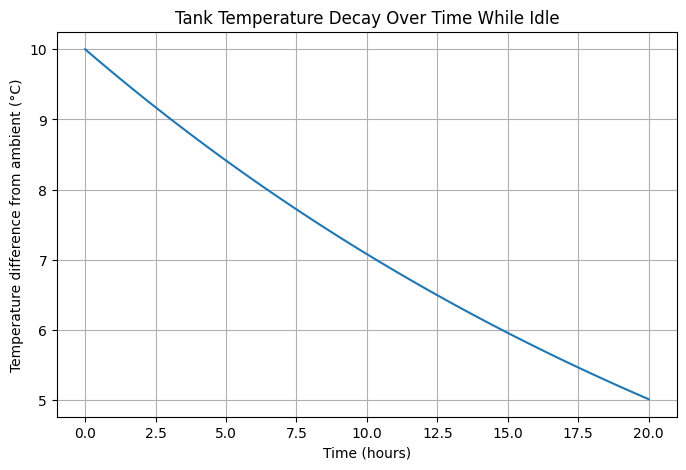

In [18]:
#Temperature in the tank as a function of time using this simple model assuming while the kiosk is idle
import matplotlib.pyplot as plt

# Constants
thermal_capacity = 60 * 4200  # J/K (mass * specific heat capacity, assuming 60 kg of water)
time = np.linspace(0, 72000, 100)  # Time from 0 to 7200 seconds (2 hours)

# Temperature function (assuming initial delta T of 10°C)
T = 10 * np.exp(-time / (thermal_capacity * Rtherm))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time / 3600, T)  # Convert time to minutes for better readability
plt.xlabel("Time (hours)")
plt.ylabel("Temperature difference from ambient (°C)")
plt.title("Tank Temperature Decay Over Time While Idle")
plt.grid(True)
plt.show()
#conclusion: once it is cooled it will stay cold

As can be seen from the graph it takes hours for the tank to cool. This is an interesting development as it was earlier assumed that the water in the mains is cold and it gets heated up as it passes through the filters. However, these results may suggest that either the mains water is not as cold as previously thought or the temperature inside the tank is much higher due radiative heating.

Cooling the whole tank results in similar power as cooling on demand. The higher efficiency of cyclic coolers is offset by the need to cool the whole tank no matter whether the customer wants  cold water or not.

A significant downside of cooling the whole tank is the reduced effectiveness of passive cooling. It is unknown and should be subject to further study, how colder tank temperature would affect passive cooling, but it is likely that especially in dry season, when passive cooling achieves best results, the power savings thanks to it would be reduced.

Finally the model as used in this approximation may seem crude, but it was verified by CFD analysis by Oscar.

## 3. Cooling Using Tap Water
Tap water, in most countries, is coming from mains supplies deep underground, and so when continuously running can be up to 15 degrees cooler than ambient temperatures during the day. In the current setup it is assumed that the water is close to ambient temp when it enters the tank. This provides us with a 'free' method of cooling if we can harness it correctly. The idea would be to have some sort of heat exchanger between incoming unfiltered tap water and the cold tank. Limitations to consider include:


*   Slow moving water before reaching tank, or lots of exposed pipe - meaning water is ambient by the time it reaches the tank, which would have an actively detrimental effect on power consumption
*   Cost, heat exchangers can be expensive, and just using copper pipe as a heat exchanger also adds up cost quickly
*   Heat exchanger interface compromises cold tank insulation
* Additional pipe length and complexity increases power consumption from pump
* Some heat exchangers will want both fluids to be moving through the system, introducing an entirely new pumping system for the cold tank

This code looks at the faesability of using copper piping through the tank as a method of heat exchange compared to the high efficiencies that heat excchangers give


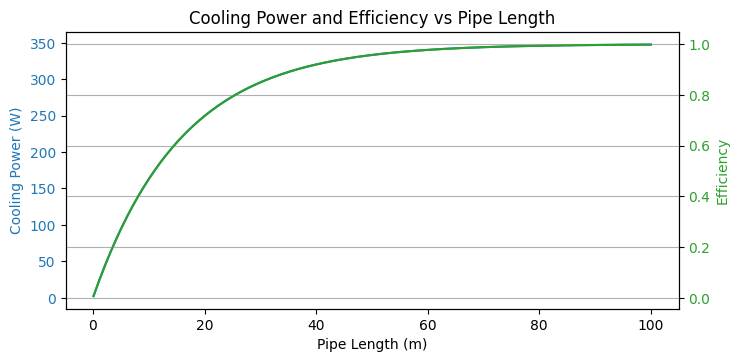

Reynolds number: 1411.9
Outlet temperature: 10.59 °C
Cooling power: 41.25 W
Max theoretical power: 348.14 W
Efficiency: 11.8 %


In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt

def water_properties():
    return {
        'rho': 998,     # kg/m³
        'mu': 0.001,    # Pa·s
        'cp': 4186,     # J/kg·K
        'k': 0.6        # W/m·K
    }

def compute_cooling(flow_rate_Lps, dT_tap, dT_tank, d_pipe_mm, L_pipe_m, T_ambient=25):
    # Convert units
    d = d_pipe_mm / 1000
    A_cross = math.pi * (d ** 2) / 4
    flow_m3ps = flow_rate_Lps / 1000

    props = water_properties()
    rho, mu, cp, k = props['rho'], props['mu'], props['cp'], props['k']

    # Flow properties
    velocity = flow_m3ps / A_cross
    Re = rho * velocity * d / mu
    Pr = cp * mu / k

    # Nusselt number
    if Re >= 4000:
        Nu = 0.023 * Re**0.8 * Pr**0.3
    else:
        Nu = 4.36  # Laminar, constant wall temp

    h_in = Nu * k / d
    h_out = 200  # natural convection
    U = 1 / (1/h_in + 1/h_out)

    # Surface area
    A_surface = math.pi * d * L_pipe_m

    # Inlet and outlet temperatures
    T_in = T_ambient - dT_tap
    T_wall = T_ambient - dT_tank  # pipe is immersed in this constant-temp tank

    m_dot = flow_m3ps * rho  # kg/s

    # Outlet temp via exponential model
    exponent = -U * A_surface / (m_dot * cp)
    T_out = T_wall - (T_wall - T_in) * math.exp(exponent)

    # Actual heat transfer
    Q = m_dot * cp * (T_out - T_in)

    # Max possible (bring cold water fully to tank temp)
    Q_max = m_dot * cp * (T_wall - T_in)
    efficiency = Q / Q_max if Q_max > 0 else 0

    return {
        'Re': Re,
        'T_out': T_out,
        'Q': Q,
        'Q_max': Q_max,
        'efficiency': efficiency
    }
def plot_cooling_vs_length(flow_rate_Lps, dT_tap, dT_tank, d_pipe_mm, max_length=100):
    lengths = np.linspace(0.1, max_length, 200)  # start at 0.1 m to avoid div-by-zero
    cooling_power = []
    efficiency = []

    for L in lengths:
        result = compute_cooling(flow_rate_Lps, dT_tap, dT_tank, d_pipe_mm, L)
        cooling_power.append(result['Q'])
        efficiency.append(result['efficiency'])

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Pipe Length (m)')
    ax1.set_ylabel('Cooling Power (W)', color='tab:blue')
    ax1.plot(lengths, cooling_power, label='Cooling Power', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Efficiency', color='tab:green')
    ax2.plot(lengths, efficiency, label='Efficiency', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title('Cooling Power and Efficiency vs Pipe Length')
    plt.grid(True)
    plt.show()


# === Inputs ===
flow_rate = 0.5 / 30      # L/s
dT_tap = 15               # Cold water is 15°C below ambient
dT_tank = 10              # Tank is kept 10°C below ambient
d_pipe = 15                # mm
L_pipe = 2                # m


plot_cooling_vs_length(flow_rate, dT_tap, dT_tank, d_pipe)


result = compute_cooling(flow_rate, dT_tap, dT_tank, d_pipe, L_pipe)

# === Output ===
print(f"Reynolds number: {result['Re']:.1f}")
print(f"Outlet temperature: {result['T_out']:.2f} °C")
print(f"Cooling power: {result['Q']:.2f} W")
print(f"Max theoretical power: {result['Q_max']:.2f} W")
print(f"Efficiency: {result['efficiency']*100:.1f} %")


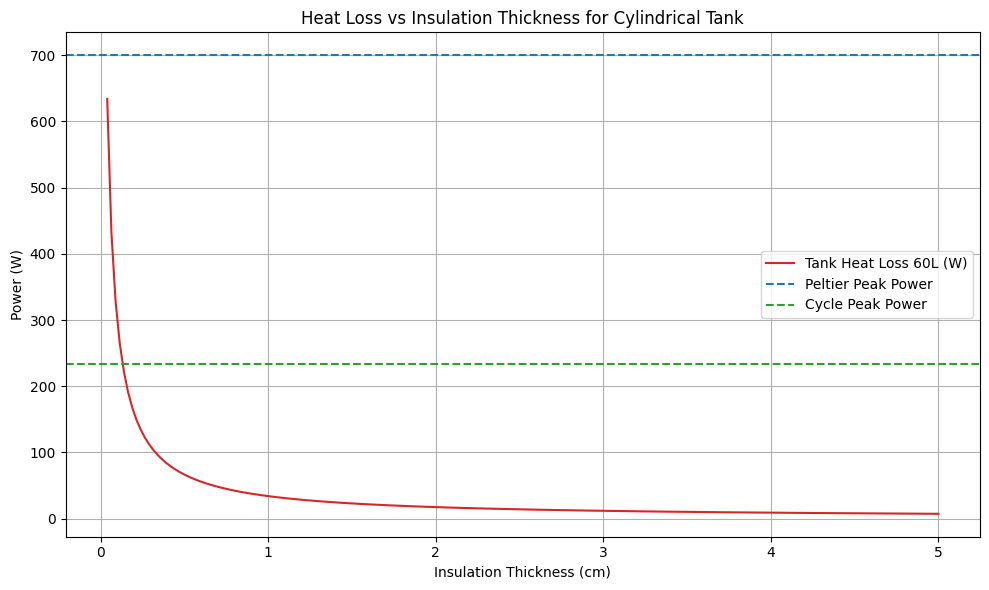

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def tank_dimensions(V_m3):
    # Given volume V and height = 2 * radius, solve for radius and height
    # V = π * r^2 * h = π * r^2 * (2r) = 2πr^3
    r = (V_m3 / (2 * np.pi))**(1/3)
    h = 2 * r
    return r, h

def heat_loss_tank(V_m3, dT, lambda_insul, thickness_range):
    r, h = tank_dimensions(V_m3)

    Q_total = []

    for t in thickness_range:
        if t == 0:
            t = 1e-6  # Avoid division by zero

        # Surface areas
        A_side = 2 * np.pi * r * h
        A_ends = 2 * np.pi * r**2
        A_total = A_side + A_ends

        # Outer radius for cylindrical wall
        r_outer = r + t

        # Thermal resistance for side and ends
        R_side = np.log(r_outer / r) / (2 * np.pi * lambda_insul * h)
        R_end = t / (lambda_insul * A_ends)  # flat insulation approximation

        # Total resistance (parallel: combine ends and side)
        R_total = 1 / (1 / R_side + 1 / R_end)
        Q = dT / R_total  # Heat loss power (W)
        Q_total.append(Q)

    return Q_total

# === Parameters ===
V_m3 = 0.06           # Tank volume in m³ (e.g. 200L)
dT = 10              # Temperature difference (K)
lambda_insul = 0.04  # W/m·K
thickness_cm = np.linspace(0.04, 5, 200)  # cm
thickness_m = thickness_cm / 100        # convert to meters

# Compute heat loss
Q_loss = heat_loss_tank(V_m3, dT, lambda_insul, thickness_m)

# Cooling power to remove 10°C at 1 L/min
Q_Peltier = 700
Q_Cycle = 233

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.plot(thickness_cm, Q_loss, label='Tank Heat Loss 60L (W)', color='tab:red')
plt.axhline(Q_Peltier, color='tab:blue', linestyle='--', label='Peltier Peak Power')
plt.axhline(Q_Cycle, color='tab:green', linestyle='--', label='Cycle Peak Power')
plt.xlabel('Insulation Thickness (cm)')
plt.ylabel('Power (W)')
plt.title('Heat Loss vs Insulation Thickness for Cylindrical Tank')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 4. Cooling a smaller tank

A possible way of combining the benefits of cyclic cooling with giving the customer a choice whether they want cold water is by addition of a smaller tank. This smaller tank could be cooled by a continously running refrigerant cycle and would result in significant energy savings. However, this is the most complex of all the solutions as it requires both another well-insulated tank, which has to be kept airtight and a refrigerant cycle. This complexity would considerably increase the cost of the device. This would result in the following energy demand as calculated earlier:

In [26]:
Cycle_electrical_power = Power/COP_cycle * Cold_water_ratio
print(f"Electrical power necessary to cool the water using cycle coolers = {Cycle_electrical_power:.0f} Watts")

Electrical power necessary to cool the water using cycle coolers = 70 Watts


This is is the most energy efficient solution, but also the most complex one and the most expensive.

## Full system modelling

This cell provides a holistic model of the whole device. It allows to realistically model operation of the device in peak hours and can be used ot draw several interesting conclusions:

- there is always some idle time between the users, this reduces overall power demand
- During peak period the water dispensal rate can be quite high and the tank empties fast. This allows to advise decisions on when to refill the tank and and what tank sizes would result in optimal performance



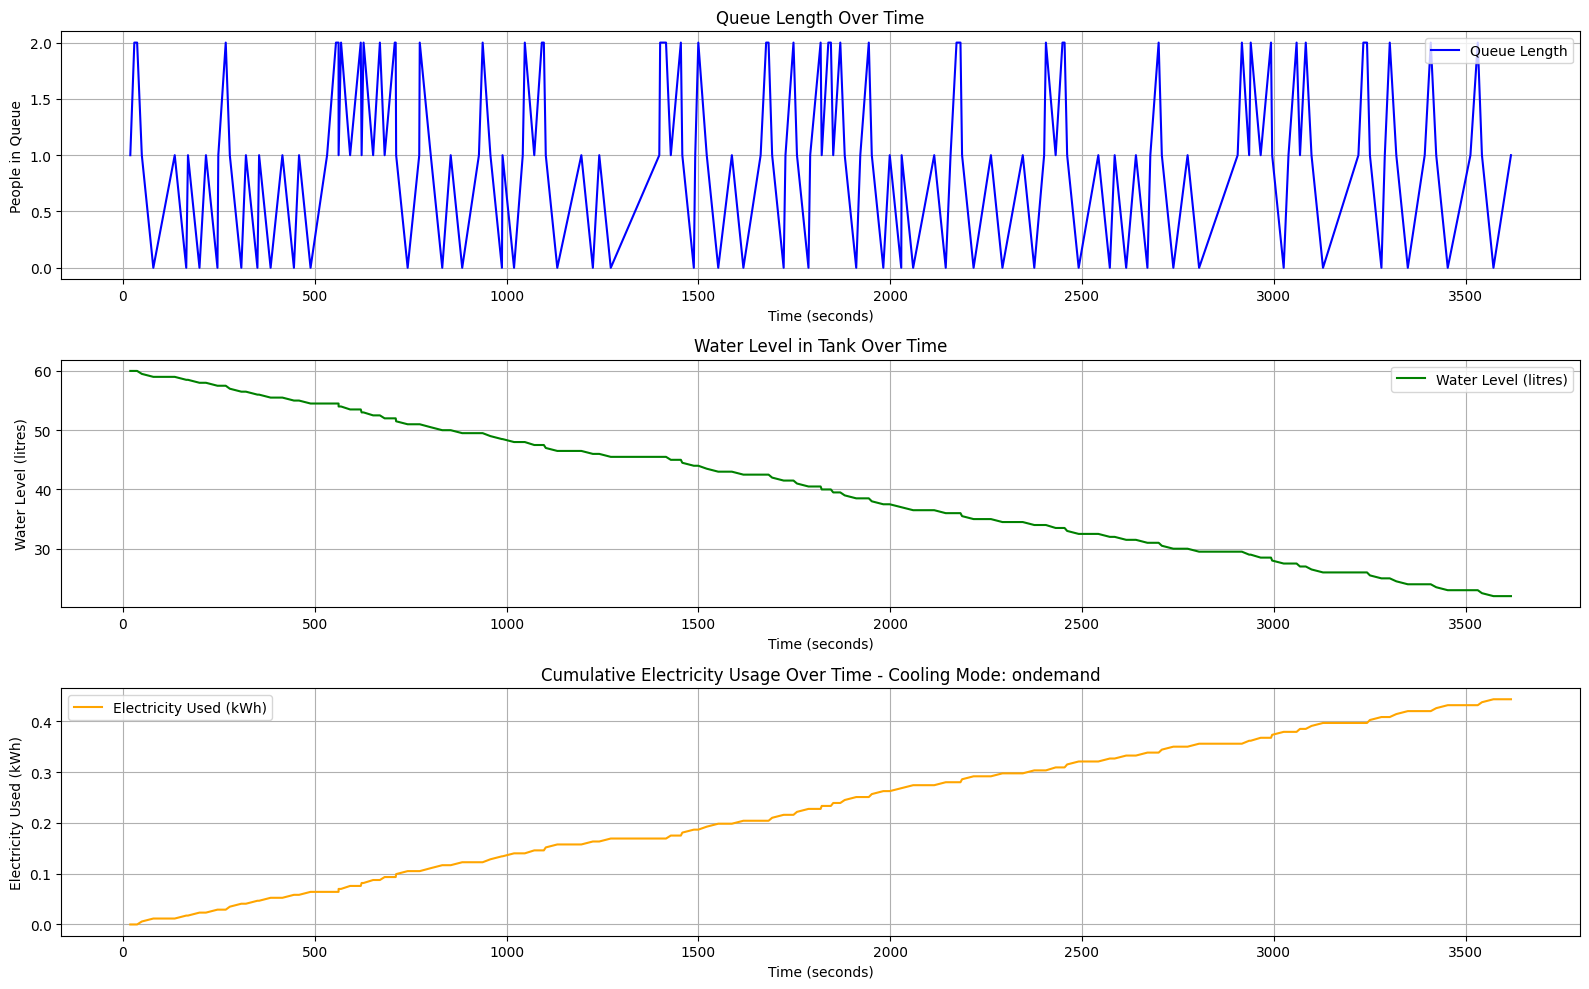

In [24]:
import random
import matplotlib.pyplot as plt

def simulate_dispenser_system(k, sim_time=3600, cooling_mode="constant", seed=41):
    random.seed(seed)

    # System Parameters
    arrival_rate = 1 / 40
    service_time = 30
    water_per_dispense = 0.5
    water_tank = 60

    # Electricity parameters
    constant_power = 250  # watts
    burst_power = 2100     # watts
    burst_duration = 10   # seconds
    total_energy_joules = 0

    # State variables
    current_time = 0
    next_arrival = random.expovariate(arrival_rate)
    next_departure = float('inf')
    people_in_system = 0
    rejected = 0

    # Logs
    queue_log = []
    water_log = []
    electricity_log = []

    while current_time < sim_time:
        if next_arrival < next_departure:
            current_time = next_arrival
            if people_in_system < k and water_tank >= water_per_dispense:
                people_in_system += 1
                if people_in_system == 1:
                    next_departure = current_time + service_time
            else:
                rejected += 1
            next_arrival = current_time + random.expovariate(arrival_rate)
        else:
            current_time = next_departure
            people_in_system -= 1
            water_tank -= water_per_dispense

            if cooling_mode == "ondemand":
                total_energy_joules += burst_power * burst_duration

            if people_in_system > 0:
                next_departure = current_time + service_time
            else:
                next_departure = float('inf')

        # Constant cooling energy update
        if cooling_mode == "constant":
            delta_t = 1 #if queue_log else current_time
            total_energy_joules = constant_power * current_time

        # Log states
        queue_log.append((current_time, people_in_system))
        water_log.append((current_time, water_tank))
        electricity_log.append((current_time, total_energy_joules / (3600 * 1000)))  # in kWh

    return queue_log, water_log, electricity_log, rejected

# --- Run Simulation ---
k = 2
sim_time = 3600
mode = 'ondemand'  # or "constant" or 'ondemand'

queue_data, water_data, electricity_data, rejected = simulate_dispenser_system(k, sim_time, cooling_mode=mode)

# --- Extract Data ---
queue_times, queue_lengths = zip(*queue_data)
water_times, water_levels = zip(*water_data)
elec_times, elec_kwh = zip(*electricity_data)

# --- Plotting ---
plt.figure(figsize=(16, 10))

# Plot 1: Queue Length
plt.subplot(3, 1, 1)
plt.plot(queue_times, queue_lengths, label='Queue Length', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('People in Queue')
plt.title('Queue Length Over Time')
plt.grid(True)
plt.legend()

# Plot 2: Water Level
plt.subplot(3, 1, 2)
plt.plot(water_times, water_levels, label='Water Level (litres)', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Water Level (litres)')
plt.title('Water Level in Tank Over Time')
plt.grid(True)
plt.legend()

# Plot 3: Electricity Usage
plt.subplot(3, 1, 3)
plt.plot(elec_times, elec_kwh, label='Electricity Used (kWh)', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Electricity Used (kWh)')
plt.title(f'Cumulative Electricity Usage Over Time - Cooling Mode: {mode}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Steady State Queue Distribution:
 P(0 in system) = 0.3646
 P(1 in system) = 0.4941
 P(2 in system) = 0.1360


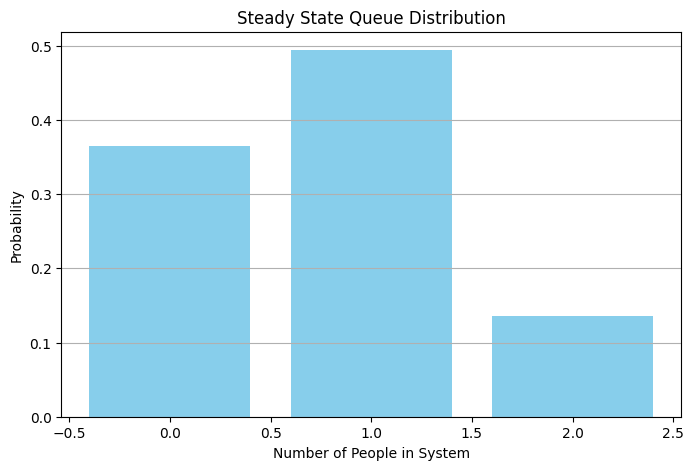

In [25]:
from collections import defaultdict

def calculate_steady_state_distribution(queue_log):
    state_durations = defaultdict(float)

    for i in range(1, len(queue_log)):
        prev_time, prev_count = queue_log[i - 1]
        curr_time, _ = queue_log[i]
        duration = curr_time - prev_time
        state_durations[prev_count] += duration

    total_time = queue_log[-1][0]
    distribution = {state: duration / total_time for state, duration in sorted(state_durations.items())}
    return distribution

# --- Calculate Steady State Distribution ---
steady_state_dist = calculate_steady_state_distribution(queue_data)

# Print distribution
print("Steady State Queue Distribution:")
for state, prob in steady_state_dist.items():
    print(f" P({state} in system) = {prob:.4f}")

# Optional: Plot steady state distribution
plt.figure(figsize=(8, 5))
plt.bar(steady_state_dist.keys(), steady_state_dist.values(), color='skyblue')
plt.xlabel('Number of People in System')
plt.ylabel('Probability')
plt.title('Steady State Queue Distribution')
plt.grid(True, axis='y')
plt.show()
